In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasRegressor, KerasClassifier



In [2]:
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Data/Finish/TPath_300_finish_data.pkl')
data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
1,0,-0.00200,300,7000,9000,532.25
2,0,-0.00199,300,7000,9000,536.47
3,0,-0.00198,300,7000,9000,540.69
4,0,-0.00197,300,7000,9000,544.90
5,0,-0.00196,300,7000,9000,549.09
...,...,...,...,...,...,...
120997,300,0.00196,300,7000,9000,422.17
120998,300,0.00197,300,7000,9000,422.04
120999,300,0.00198,300,7000,9000,421.90
121000,300,0.00199,300,7000,9000,421.76


In [3]:
df = data.drop(data.columns[2:5], axis = 1)
df

,X-Koordinate,Y-Koordinate,Temperatur
1,0,-0.00200,532.25
2,0,-0.00199,536.47
3,0,-0.00198,540.69
4,0,-0.00197,544.90
5,0,-0.00196,549.09
...,...,...,...
120997,300,0.00196,422.17
120998,300,0.00197,422.04
120999,300,0.00198,421.90
121000,300,0.00199,421.76


In [4]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

        X-Koordinate  Y-Koordinate  Temperatur
85427            212       0.00002      789.97
6977              17      -0.00058      896.26
101558           252       0.00053      731.63
22333             55       0.00022      900.43
13974             34       0.00105      791.90
...              ...           ...         ...
110269           274      -0.00080      697.25
119880           298      -0.00117      652.65
103695           257       0.00180      637.77
861                2      -0.00144      737.98
15796             39      -0.00083      868.79

[121001 rows x 3 columns]


,X-Koordinate,Y-Koordinate,Temperatur
0,212,0.00002,789.97
1,17,-0.00058,896.26
2,252,0.00053,731.63
3,55,0.00022,900.43
4,34,0.00105,791.90
...,...,...,...
120996,274,-0.00080,697.25
120997,298,-0.00117,652.65
120998,257,0.00180,637.77
120999,2,-0.00144,737.98


In [5]:
label = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df1 = df_reset.drop("Temperatur", axis=1)
X = df1
y = label


In [6]:
X

,X-Koordinate,Y-Koordinate
0,212,0.00002
1,17,-0.00058
2,252,0.00053
3,55,0.00022
4,34,0.00105
...,...,...
120996,274,-0.00080
120997,298,-0.00117
120998,257,0.00180
120999,2,-0.00144


In [7]:
y

0         789.97
1         896.26
2         731.63
3         900.43
4         791.90
           ...  
120996    697.25
120997    652.65
120998    637.77
120999    737.98
121000    868.79
Name: Temperatur, Length: 121001, dtype: float64

In [134]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [135]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
scaler_features2 = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)  # Nutze unterschiedliche Skalierungsparameter

# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()


# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))


In [136]:
X_train_scaled

array([[0.48666667, 0.7575    ],
       [0.06666667, 0.4075    ],
       [0.48333333, 0.2       ],
       ...,
       [0.27333333, 0.745     ],
       [0.36333333, 0.64      ],
       [0.89666667, 0.49      ]])

In [152]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=2))
# Eingabeschicht mit 2 Features
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
# Eine versteckte Schicht
model.add(Dense(1, activation= 'linear'))  # Ausgabeschicht für die Temperaturvorhersage


In [153]:
# Lernplan erstellen
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True)

In [154]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [155]:
history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=5, batch_size=100, verbose=1)


Epoch 1/5
775/775 [==============================] - 2s 2ms/step - loss: 0.0258 - mean_absolute_error: 0.1004 - val_loss: 0.0043 - val_mean_absolute_error: 0.0366
Epoch 2/5
775/775 [==============================] - 1s 2ms/step - loss: 0.0032 - mean_absolute_error: 0.0238 - val_loss: 0.0028 - val_mean_absolute_error: 0.0175
Epoch 3/5
775/775 [==============================] - 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0161 - val_loss: 0.0027 - val_mean_absolute_error: 0.0164
Epoch 4/5
775/775 [==============================] - 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0148 - val_loss: 0.0027 - val_mean_absolute_error: 0.0186
Epoch 5/5
775/775 [==============================] - 1s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0141 - val_loss: 0.0027 - val_mean_absolute_error: 0.0176


In [156]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'Test MAE: {test_mae}')
print(f'Test Loss: {test_loss}')


scaled_predicted_values = model.predict(X_test_scaled, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled)  # y_test sind die skalierten tatsächlichen Werte

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")
    
    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]
    
    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)
    
    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

Test MAE: 0.017021287232637405
Test Loss: 0.002172417240217328
Durchschnittliche Abweichung (MAE): [15.55847901]


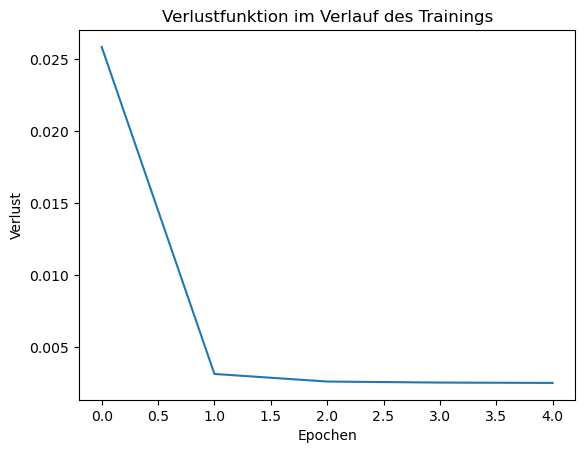

In [157]:
# Plot erstellen
loss_values = history.history['loss']
plt.plot(loss_values)
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.title('Verlustfunktion im Verlauf des Trainings')
plt.show()

# GridSearch

In [11]:
# Schritt 1: Definiere dein Modell als eine Funktion, die Hyperparameter akzeptiert
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation=activation))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Schritt 2: Erstelle eine Instanz von KerasRegressor ohne batch_size und epochs im param_grid
model = KerasRegressor(model=build_model, verbose=1)

# Schritt 3: Definiere den Parameter-Raum für die Grid-Suche OHNE batch_size und epochs
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh']
}

# Optional: Definiere Fit-Parameter (wie batch_size und epochs) separat
fit_params = {
    'batch_size': 32,
    'epochs': 10
}

# Schritt 4: Führe GridSearchCV aus mit fit_params, wenn nötig
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled, **fit_params)

# Ergebnisse ausgeben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print("%f with: %r" % (mean_score, params))




Epoch 1/10


3025/3025 [==============================] - 6s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 2/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 3/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 4/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 6/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 7/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 8/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 9/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_er

In [12]:
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation=activation))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

model = KerasRegressor(model=build_model, verbose=1)

param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'fit__batch_size': [10, 20, 32],  # Testen verschiedener batch_size Werte
    'fit__epochs': [5, 10]  # Optional: Testen verschiedener epoch Werte
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled)

# Ergebnisse ausgeben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print("%f with: %r" % (mean_score, params))


Epoch 1/5
4840/4840 [==============================] - 10s 2ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 2/5
4840/4840 [==============================] - 9s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 3/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 4/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Best: 0.845704 using {'fit__batch_size': 20, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'adam'}
0.840889 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'adam'}
0.834983 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'sgd'}
0.833309 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'tanh', 'model__opt